# Exploratory Data Analysis 

#CRISP-DM methodology

### Business Undestanding

Goal:

Apply analytics to predict secondary school student performance in STEM (Science, Technology, Engineering, and Mathematics)

### Initial Setup

In [1]:
#Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
#Read data from file
data = pd.read_csv('cs_01.csv')
data.head()

,no,school,sex,age,address,p_status,m_edu,f_edu,m_job,f_job,...,study_time,failures,fam_sup,higher,internet,fam_rel,go_out,health,absences,final_grade
0,1,GP,F,18,U,A,4,4,at_home,teacher,...,2,0,no,yes,no,4,4,3,6,6
1,2,GP,F,17,U,T,1,1,at_home,other,...,2,0,yes,yes,yes,5,3,3,4,6
2,3,GP,F,15,U,T,1,1,at_home,other,...,2,3,no,yes,yes,4,2,3,10,10
3,4,GP,F,15,U,T,4,2,health,services,...,3,0,yes,yes,yes,3,2,5,2,15
4,5,GP,F,16,U,T,3,3,other,other,...,2,0,yes,yes,no,4,2,5,4,10


In [3]:
data.shape

(395, 21)

### Exploratory Data Analysis Check List

1: Understand data collection process

2: Document data set description (meta data)

3: Check for missing values

4: Univariate data analysis

5: Bivariate data analysis

6: Inferential Statistics (optional)

#### 1: Understand data collection process

Ref: 
    
P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. 

#### 2: Document Data Set Description (Meta Data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   no           395 non-null    int64 
 1   school       395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   p_status     395 non-null    object
 6   m_edu        395 non-null    int64 
 7   f_edu        395 non-null    int64 
 8   m_job        395 non-null    object
 9   f_job        395 non-null    object
 10  travel_time  395 non-null    int64 
 11  study_time   395 non-null    int64 
 12  failures     395 non-null    int64 
 13  fam_sup      395 non-null    object
 14  higher       395 non-null    object
 15  internet     395 non-null    object
 16  fam_rel      395 non-null    int64 
 17  go_out       395 non-null    int64 
 18  health       395 non-null    int64 
 19  absences     395 non-null    

0 no: number

1 school: student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)

2 sex: student's sex (binary: "F" - female or "M" - male)

3 age: student's age (numeric: from 15 to 22)

4 address: student's home address type (binary: "U" - urban or "R" - rural)

5 p_status: parent's cohabitation status (binary: "T" - living together or "A" - apart)

6 m_edu: mother's education (ordinal: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

7 f_edu: father's education (ordinal: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

8 m_job: mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

9 f_job: father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")

10 travel_time: home to school travel time (ordinal: 1 - < 15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - > 1 hour)

11 study_time: weekly study time (ordinal: 1 - < 2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - > 10 hours)

12 failures: number of past class failures (numeric: n if 1 <= n < 3, else 4)

13 fam_sup: family educational support (binary: yes or no)

14 higher: wants to take higher education (binary: yes or no)

15 internet: Internet access at home (binary: yes or no)

16 fam_rel: quality of family relationships (ordinal: from 1 - very bad to 5 - excellent)

17 go_out: going out with friends (ordinal: from 1 - very low to 5 - very high)

18 health: current health status (ordinal: from 1 - very bad to 5 - very good)

19 absences: number of school absences (numeric: from 0 to 93)

20 final_grade: final grade for Math course (numeric: from 0 to 20, output target)


#### 3: Check for missing values

In [5]:
np.sum(data.isnull())

no             0
school         0
sex            0
age            0
address        0
p_status       0
m_edu          0
f_edu          0
m_job          0
f_job          0
travel_time    0
study_time     0
failures       0
fam_sup        0
higher         0
internet       0
fam_rel        0
go_out         0
health         0
absences       0
final_grade    0
dtype: int64

#### 4: Univariate data analysis

In [6]:
#sex (categorical - binary), Check for imbalanced data
sex_freq = data['sex'].value_counts()
sex_freq

F    208
M    187
Name: sex, dtype: int64

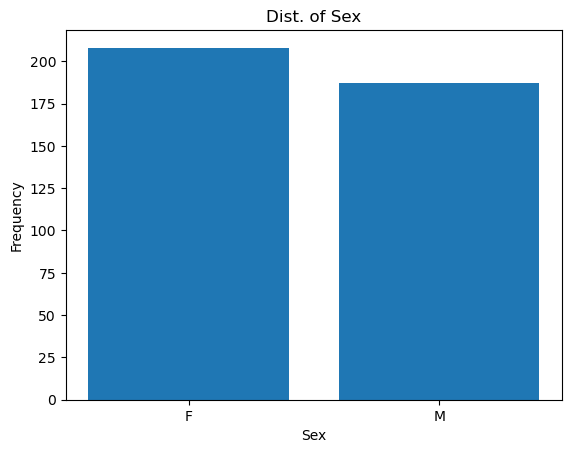

In [7]:
#Bar plot for sex
plt.bar(sex_freq.index, sex_freq.values)
plt.xticks(sex_freq.index)
plt.title('Dist. of Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()

In [8]:
#age (numerical)
data['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

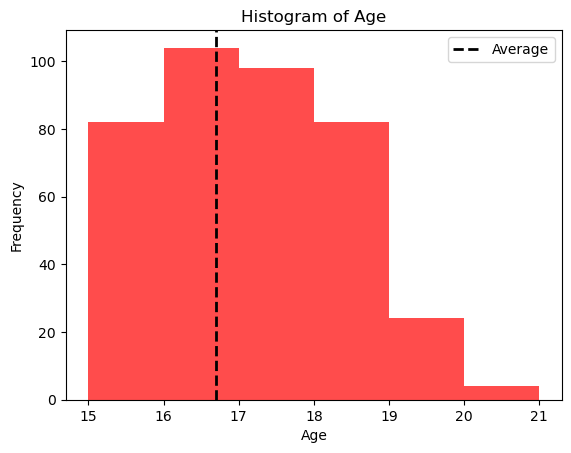

In [9]:
#Histogram for age
plt.hist(data['age'], bins = np.arange(data['age'].min(), data['age'].max()),
         color = 'red', alpha = 0.7)
plt.axvline(data['age'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
#p_status (categorical - binary), check for imbalanced data
p_status_freq = data['p_status'].value_counts()
p_status_freq

T    354
A     41
Name: p_status, dtype: int64

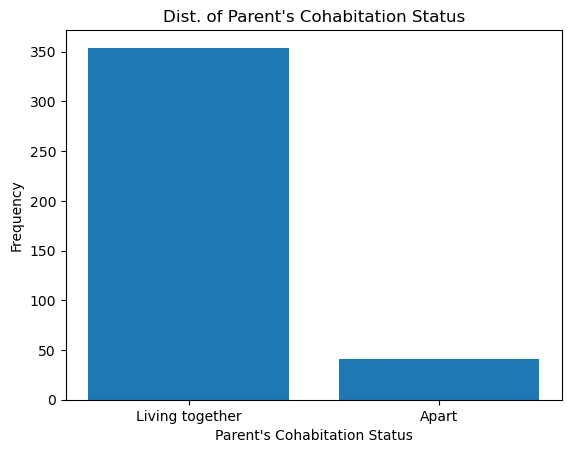

In [11]:
#Bar plot for sex
plt.bar(p_status_freq.index, p_status_freq.values)
plt.xticks(ticks = [0, 1], labels = ['Living together', 'Apart'])
plt.title("Dist. of Parent's Cohabitation Status")
plt.xlabel("Parent's Cohabitation Status")
plt.ylabel('Frequency')
plt.show()

In [12]:
#m_edu (categorical - ordinal)
m_edu_freq = data['m_edu'].value_counts()
m_edu_freq

4    131
2    103
3     99
1     59
0      3
Name: m_edu, dtype: int64

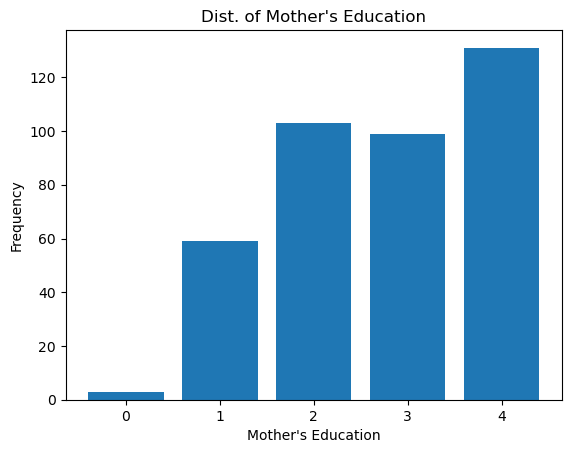

In [13]:
#Bar plot for m_edu
plt.bar(m_edu_freq.index, m_edu_freq.values)
plt.xticks(m_edu_freq.index)
plt.title("Dist. of Mother's Education")
plt.xlabel("Mother's Education")
plt.ylabel('Frequency')
plt.show()

In [14]:
#m_job (categorical - nominal)
m_job_freq = data['m_job'].value_counts()
m_job_freq

other       141
services    103
at_home      59
teacher      58
health       34
Name: m_job, dtype: int64

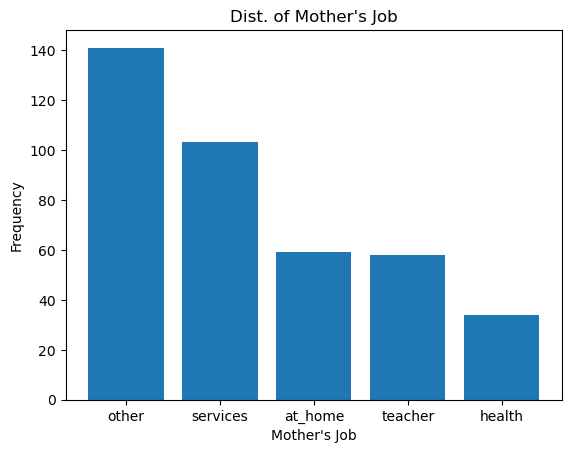

In [15]:
#Bar plot for m_job
plt.bar(m_job_freq.index, m_job_freq.values)
plt.xticks(m_job_freq.index)
plt.title("Dist. of Mother's Job")
plt.xlabel("Mother's Job")
plt.ylabel('Frequency')
plt.show()

In [16]:
#absences (numerical)
data['absences'].describe()

count    395.000000
mean       5.708861
std        8.003096
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

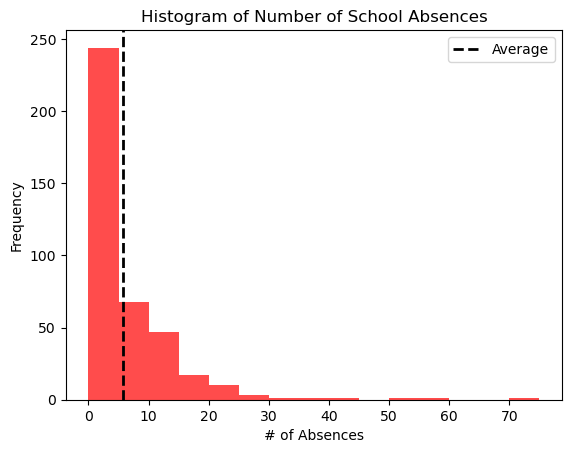

In [17]:
#Histogram for absences
plt.hist(data['absences'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(data['absences'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.title('Histogram of Number of School Absences')
plt.xlabel('# of Absences')
plt.ylabel('Frequency')
plt.legend()
plt.show()

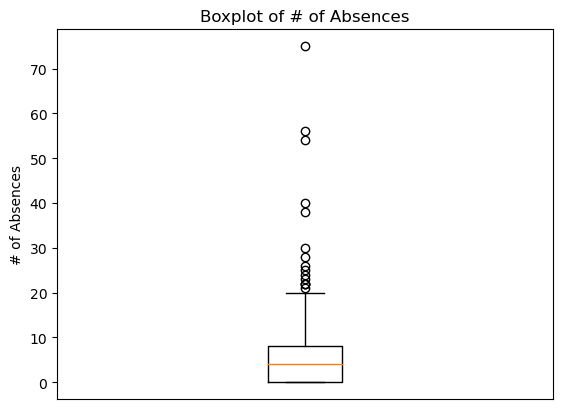

In [18]:
#Box Plot
plt.boxplot(data['absences'])
plt.title('Boxplot of # of Absences')
plt.xticks([]) #remove the xticks 
plt.ylabel('# of Absences')
plt.show()

In [19]:
#final_grade (numerical)
data['final_grade'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: final_grade, dtype: float64

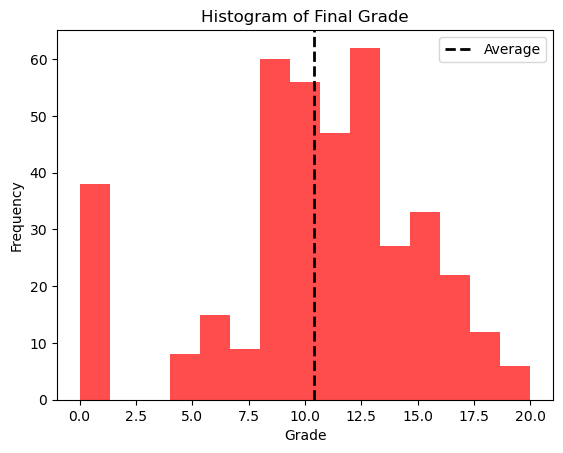

In [20]:
#Histogram for final_grade
plt.hist(data['final_grade'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(data['final_grade'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.title('Histogram of Final Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [21]:
np.sum(data['final_grade'] == 0)

38

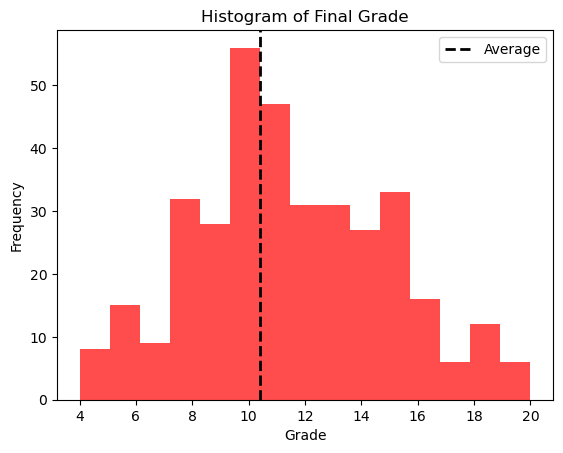

In [22]:
#Histogram for final_grade (greater than zero)
positive_grade = data.loc[data['final_grade'] > 0, :]
plt.hist(positive_grade['final_grade'], bins = 15,
         color = 'red', alpha = 0.7)
plt.axvline(data['final_grade'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.title('Histogram of Final Grade')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

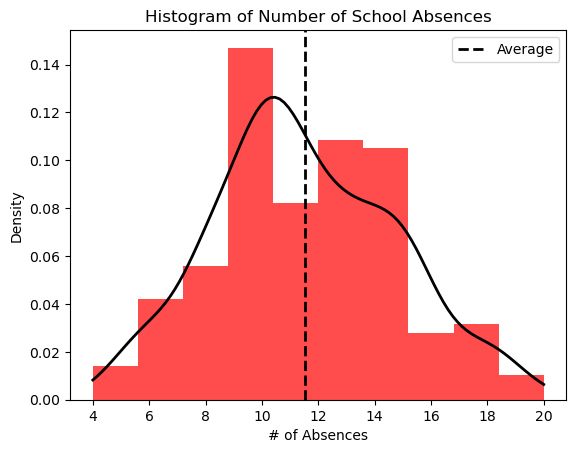

In [23]:
#Check for normality of final_grade
#https://analica.ir/normality-test/

#Step 1: Histogram w/ density plot
#Calculate density
from scipy import stats
density = stats.gaussian_kde(positive_grade['final_grade'])
xp = np.linspace(positive_grade['final_grade'].min(), positive_grade['final_grade'].max(), 100)
yp = density.pdf(xp)

#Histogram
plt.hist(positive_grade['final_grade'], bins = 10, 
         color = 'red', alpha = 0.7, density = True)
plt.axvline(positive_grade['final_grade'].mean(), color = 'black', linewidth = 2, linestyle = '--', label = "Average")
plt.title('Histogram of Number of School Absences')
plt.xlabel('# of Absences')
plt.ylabel('Density')
plt.plot(xp, yp, color = 'black', linewidth = 2)
plt.legend()
plt.show()

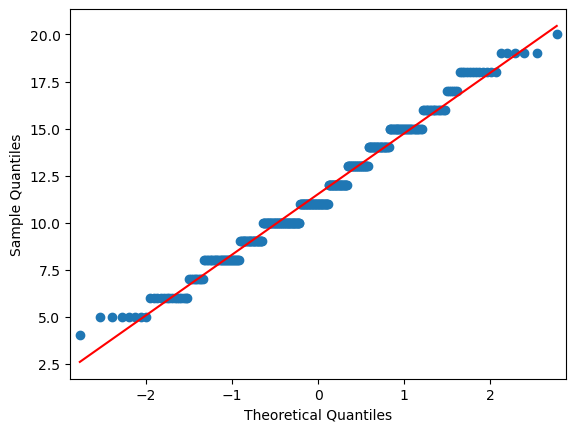

In [24]:
#Step 2: qq-plot
sm.qqplot(positive_grade['final_grade'], line = 's')
plt.show()

In [25]:
#Step 3: Hypothesis Test

#Jarque-Bera Test (Skewness = 0 ?)
#p-value < 0.05 reject normality assumption
from scipy.stats import jarque_bera
print(jarque_bera(positive_grade['final_grade']))
 
#Anscombe-Glynn Test (Kurtosis = 3 ?)
#p-value < 0.05 reject normality assumption
from scipy.stats import kurtosistest
print(kurtosistest(positive_grade['final_grade']))

#Conclusion: data is normally distributed.

SignificanceResult(statistic=5.121969228177824, pvalue=0.07722866256654043)
KurtosistestResult(statistic=-1.8621255015770584, pvalue=0.06258540220247898)


#### 5: Bivariate data analysis

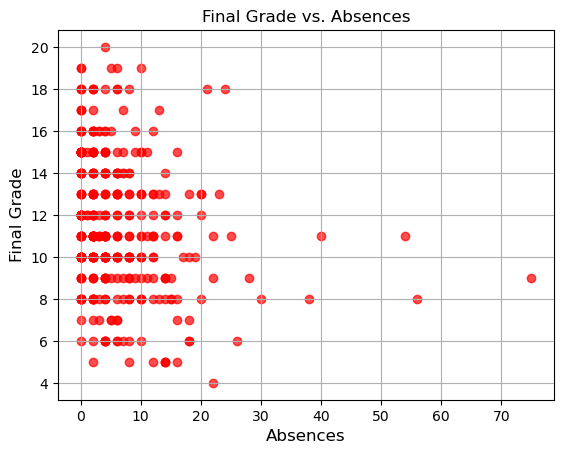

In [26]:
#Two continuous variables: final grade vs. absences
#Scatter plot
plt.scatter(x = positive_grade['absences'], 
            y = positive_grade['final_grade'], color = 'red', alpha = 0.7)
plt.title('Final Grade vs. Absences')
plt.xlabel('Absences', fontsize = 12)
plt.ylabel('Final Grade', fontsize = 12)
plt.grid()
plt.show()

In [27]:
#Correlation
#https://analica.ir/correlation/
positive_grade[['final_grade', 'absences']].corr(method = 'pearson')

,final_grade,absences
final_grade,1.000000,-0.213129
absences,-0.213129,1.000000


In [28]:
#Numerical vs categorical variables: final grade vs. p_status
positive_grade.groupby('p_status')['final_grade'].mean()

p_status
A    11.769231
T    11.493711
Name: final_grade, dtype: float64

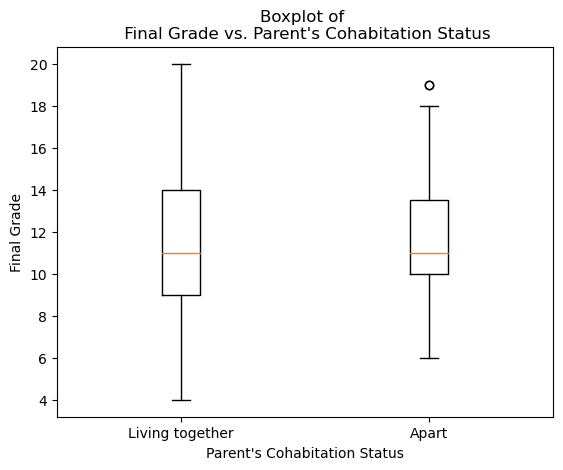

In [29]:
#Boxplot of final grade vs. p_status
plt.boxplot([positive_grade.loc[positive_grade['p_status'] == 'T', 'final_grade'], 
             positive_grade.loc[positive_grade['p_status'] == 'A', 'final_grade']])
plt.title("Boxplot of \n Final Grade vs. Parent's Cohabitation Status")
plt.xticks(ticks = [1, 2], labels = ['Living together', 'Apart'])
plt.xlabel("Parent's Cohabitation Status")
plt.ylabel('Final Grade')
plt.show()

In [30]:
#Numerical vs categorical variables: final grade vs. higher
positive_grade.groupby('higher')['final_grade'].mean()

higher
no      9.714286
yes    11.597668
Name: final_grade, dtype: float64

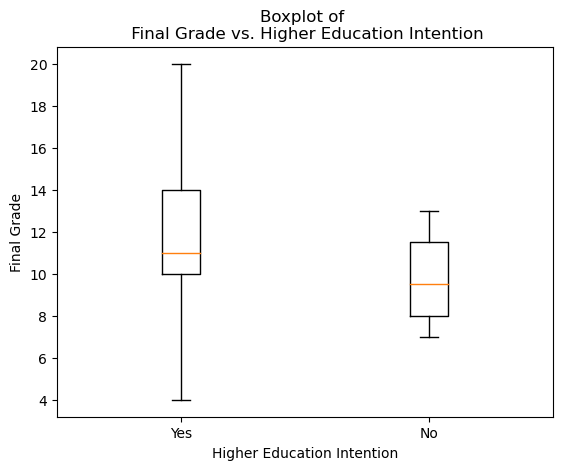

In [31]:
#Boxplot of final grade vs. higher
plt.boxplot([positive_grade.loc[positive_grade['higher'] == 'yes', 'final_grade'], 
             positive_grade.loc[positive_grade['higher'] == 'no', 'final_grade']])
plt.title('Boxplot of \n Final Grade vs. Higher Education Intention')
plt.xticks(ticks = [1, 2], labels = ['Yes', 'No'])
plt.xlabel('Higher Education Intention')
plt.ylabel('Final Grade')
plt.show()

In [32]:
#Two categorical variables: Cross Tabulation Analysis
#fam_sup vs. m_edu
cross_tab = pd.crosstab(positive_grade['fam_sup'], positive_grade['m_edu'])
cross_tab

m_edu,0,1,2,3,4
fam_sup,,,,,
no,2,26,39,34,37
yes,1,24,50,56,88


In [33]:
#Normalize over each column
cross_tab_pct = round(pd.crosstab(positive_grade['fam_sup'], 
                                  positive_grade['m_edu'], 
                                  normalize = 'columns'), 2)
cross_tab_pct

m_edu,0,1,2,3,4
fam_sup,,,,,
no,0.67,0.52,0.44,0.38,0.3
yes,0.33,0.48,0.56,0.62,0.7


#### 6: Inferential Statistics (optional)

In [34]:
#Two continuous variables: final grade vs. absences
#Hypothesis test for Pearson Correlation
    #H0: Pearson correlation coefficient is 0
    #H1: Pearson correlation coefficient is NOT 0
#If p-value < 0.05 reject H0
#Note : Normality assumption is needed.
from scipy.stats import pearsonr
pearsonr(positive_grade['absences'], positive_grade['final_grade'])
#absences NOT normally distributed

PearsonRResult(statistic=-0.21312853214380884, pvalue=4.916538246846298e-05)

In [35]:
#Hypothesis test for Spearman correlation
    #H0: Spearman correlation coefficient is 0
    #H1: Spearman correlation coefficient is NOT 0
#If p-value < 0.05 reject H0
from scipy.stats import spearmanr
spearmanr(positive_grade['absences'], positive_grade['final_grade'])

SignificanceResult(statistic=-0.244196948637836, pvalue=3.031825957781471e-06)

In [36]:
#Numerical vs categorical variables: final grade vs. p_status
#T-test for the means of two independent samples
    #H0: mu_1 = mu_2
    #H1: mu_1 # mu_2
#If p-value < 0.05 reject H0
#Note : Normality assumption is needed.
from scipy.stats import ttest_ind
ttest_ind(positive_grade.loc[positive_grade['p_status'] == 'T', 'final_grade'],
          positive_grade.loc[positive_grade['p_status'] == 'A', 'final_grade'],
          alternative = 'two-sided')

Ttest_indResult(statistic=-0.502576786493192, pvalue=0.6155734716491084)

In [37]:
#Numerical vs categorical variables: final grade vs. higher
#T-test for the means of two independent samples
    #H0: mu_1 = mu_2
    #H1: mu_1 # mu_2
#If p-value < 0.05 reject H0
#Note : Normality assumption is needed.
ttest_ind(positive_grade.loc[positive_grade['higher'] == 'yes', 'final_grade'],
          positive_grade.loc[positive_grade['higher'] == 'no', 'final_grade'],
          alternative = 'two-sided')

Ttest_indResult(statistic=2.150848367916699, pvalue=0.032162703908753795)

In [38]:
#Two categorical variables
#Chi-Square test for cross tab
    #H0: fam_sup is independent of m_edu
    #H1: fam_sup is related to m_edu
#If p-value < 0.05 reject H0
from scipy.stats import chi2_contingency
chi2_contingency(cross_tab)

Chi2ContingencyResult(statistic=10.100477065966531, pvalue=0.03876874745927037, dof=4, expected_freq=array([[ 1.15966387, 19.32773109, 34.40336134, 34.78991597, 48.31932773],
       [ 1.84033613, 30.67226891, 54.59663866, 55.21008403, 76.68067227]]))